# Neural Networks for Non-Linear Regression

## Import the dataset

In [2]:
#Import libraries
from tabulate import tabulate
import pandas as pd

the dataset is already loaded into my VScode space

In [3]:
#Import the CSV File
import pandas as pd

df = pd.read_csv("column_data_5000_clean.csv", sep=";", header=0)

#Print the dataframe to check it
print(tabulate(df, headers='keys', tablefmt='psql'))

+------+-------------------+-----------------------+-----------------------+-------------------------------+--------------------------+-----------+
|      | Name              |   Number_of_columns_X |   Number_of_columns_Y |   Column_spacing_minimum_(mm) |   Beam_span_maximum_(mm) |   Y_label |
|------+-------------------+-----------------------+-----------------------+-------------------------------+--------------------------+-----------|
|    0 | Structure_3_0_3   |                     5 |                     5 |                          1000 |                     7000 |  0.645614 |
|    1 | Structure_4_0_3   |                     6 |                     5 |                          1000 |                     7000 |  0.67321  |
|    2 | Structure_5_0_3   |                     7 |                     5 |                          1000 |                     7000 |  0.640659 |
|    3 | Structure_6_0_3   |                     8 |                     5 |                          1000 |    

In [4]:
#Normalize the data
from sklearn.preprocessing import StandardScaler

X = df.drop(["Name","Y_label"], axis=1)
y = df.Y_label

#assign the df to a new variable
X_norm = X

# Normalize data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

#normalize the values and save them to the new dataframe
for index, row in X_norm.iterrows():
    X_norm.at[index, "Number_of_columns_X"] = X_normalized[index, 0]
    X_norm.at[index, "Number_of_columns_Y"] = X_normalized[index, 1]
    X_norm.at[index, "Column_spacing_minimum_(mm)"] = X_normalized[index, 2]
    X_norm.at[index, "Beam_span_maximum_(mm)"] = X_normalized[index, 3]

print(tabulate(X_norm, headers='keys', tablefmt='psql'))

/tmp/ipykernel_8629/1227456801.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.414213562373095' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_norm.at[index, "Number_of_columns_X"] = X_normalized[index, 0]
/tmp/ipykernel_8629/1227456801.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.414213562373095' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_norm.at[index, "Number_of_columns_Y"] = X_normalized[index, 1]
/tmp/ipykernel_8629/1227456801.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.08957718580447817' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_norm.at[index, "Column_spacing_minimum

+------+-----------------------+-----------------------+-------------------------------+--------------------------+
|      |   Number_of_columns_X |   Number_of_columns_Y |   Column_spacing_minimum_(mm) |   Beam_span_maximum_(mm) |
|------+-----------------------+-----------------------+-------------------------------+--------------------------|
|    0 |             -1.41421  |             -1.41421  |                    -0.0895772 |                 0.303147 |
|    1 |             -0.707107 |             -1.41421  |                    -0.0895772 |                 0.303147 |
|    2 |              0        |             -1.41421  |                    -0.0895772 |                 0.303147 |
|    3 |              0.707107 |             -1.41421  |                    -0.0895772 |                 0.303147 |
|    4 |              1.41421  |             -1.41421  |                    -0.0895772 |                 0.303147 |
|    5 |             -1.41421  |             -1.41421  |                

## Train the model

In [5]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3,random_state=42) # 70% training and 30% test

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(64, 64, 64, 64),
                   activation='relu',
                   solver='adam',
                   learning_rate='adaptive',
                   max_iter=1000,
                   random_state=42)

mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
y_pred = mlp.predict(X_test)

print('training complete')

training complete


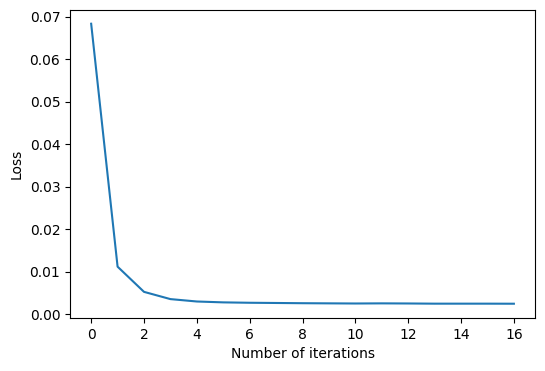

In [12]:
#Plot the loss function
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(mlp.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

### Evaluate model performance

Check the documentation to see what the .score() function returns
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score

In [13]:
mlp.score(X_test, y_test)

0.7751476627242073

Look at other metrics like Root Mean Squared Error and Mean Absolute Error

In [25]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

y_true = y_test
y_pred = mlp.predict(X_test)

rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Root mean squared error = {rmse}")
print(f"Mean absolute error = {mae}")

Root mean squared error = 0.07271947922288671
Mean absolute error = 0.040473672290542974
